In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-3.19517256,  8.47608243],
       [-0.55225914, -0.94230913],
       [-2.52550482,  1.75073188],
       ...,
       [ 3.52711806, -3.19417654],
       [-1.26872379, 10.04165259],
       [ 3.40684312, -1.01421424]], shape=(1000, 2))

In [5]:
y

array([1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0,
       1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1,
       0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2,
       2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2,

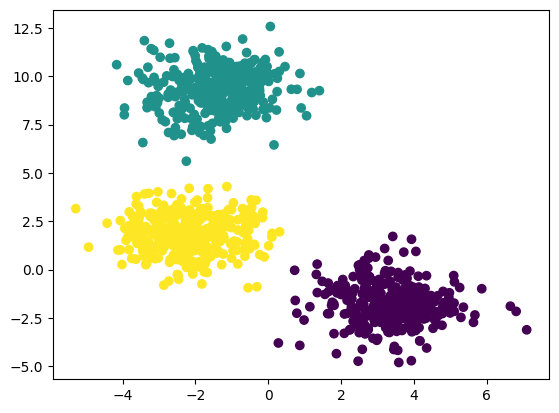

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from sklearn.cluster import KMeans

In [31]:
## Elbow method To select K Value
wcss=[]
for k in range(1,22):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [32]:
wcss

[1339.9999999999995,
 404.0501997565656,
 124.05093859152997,
 104.44580636020935,
 86.18352693840384,
 80.78371837444197,
 61.475003162670205,
 55.6925178912457,
 50.460462210972665,
 45.334173350144155,
 40.90904260101538,
 36.83294824923804,
 33.6314354901694,
 35.259303965241585,
 29.4769540092832,
 29.620520346978605,
 26.740020796332594,
 26.70056268526122,
 25.346566660981278,
 23.117888860154437,
 22.770663960455956]

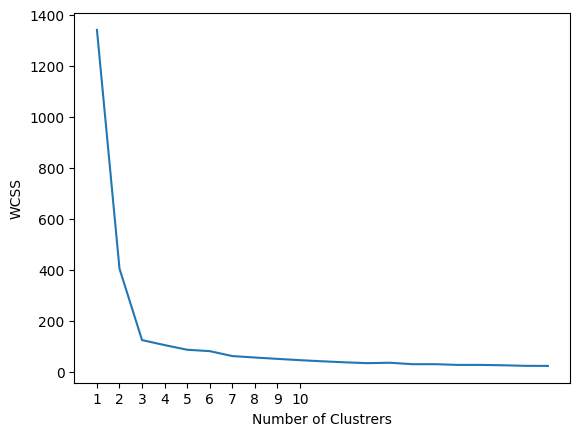

In [33]:
## plot elbow curve
plt.plot(range(1,22),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [34]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [35]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2,
       2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1,
       1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2,
       0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1,
       1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0,

In [36]:
y_pred=kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2,
       2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1,
       2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0,

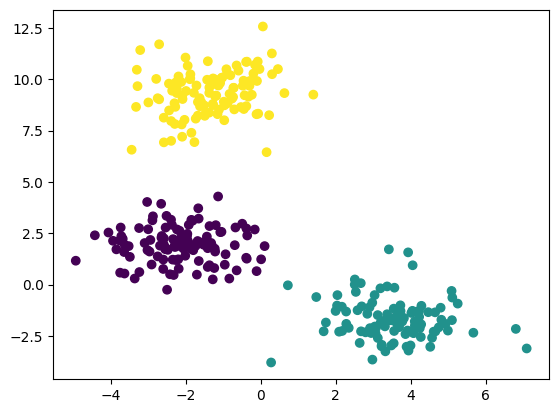

In [37]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

## Validating the k value
## kneelocator
## Silhoutee scoring

In [26]:
## kneelocator
!pip install kneed

In [27]:
from kneed import KneeLocator

In [38]:
kl=KneeLocator(range(1,22),wcss,curve="convex",direction="decreasing")

In [29]:
kl.elbow

3

In [40]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [41]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [42]:
silhouette_coefficients

[np.float64(0.6400287641312672),
 np.float64(0.7031344518130038),
 np.float64(0.573332983926129),
 np.float64(0.4842455258565714),
 np.float64(0.4574785224110245),
 np.float64(0.3775026404092095),
 np.float64(0.3844152852823423),
 np.float64(0.36488922297972043),
 np.float64(0.34986596719658786)]

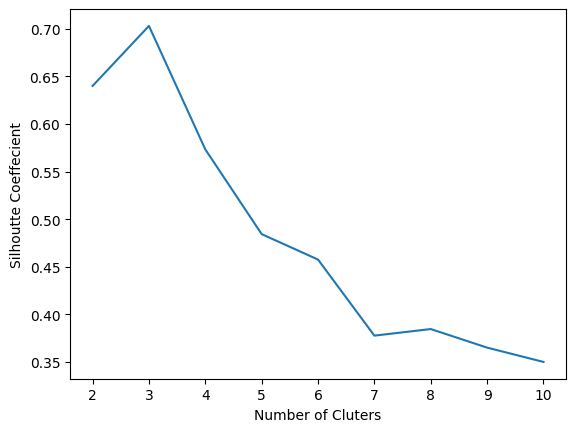

In [43]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()